<a href="https://colab.research.google.com/github/s17elgho/M2-IASD_SALMA/blob/main/DL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> DL4 <center>

In [1]:
import numpy as np
from keras.layers import Dense, Activation ## layers of the model
from tensorflow.keras.optimizers import SGD ## for learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential ## for building the model

## I- Regression : Boston Housing dataset

Load the data . <br>
Predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. The dataset you’ll use has an interesting difference from the two previous examples. It has relatively few data points: only 506, split between 404 training samples and 102 test samples. And each feature in the input data (for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on

In [54]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [55]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [56]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [109]:
train_targets[0]

15.2

We have 13 attributes and 506 examples overall

1- Scale the data . Here I used Min max scaler but you can select standard scaler as well like what the teacher did

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(train_data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [58]:
x_train = scaler.transform(train_data)
x_test = scaler.transform(test_data)

2- Build the model

In [91]:

def build_model(optimizer='adam', neurons = 64):
  model = Sequential()
  model.add(Dense(units = neurons, input_dim = 13))
  model.add(Activation('relu'))
  model.add(Dense(units = neurons))
  model.add(Activation('relu'))
  model.add(Dense(units = 1))
  model.compile(loss='mse',optimizer = optimizer,metrics=["mae"])
  return model


Fit the model. We choose as loss function the mean squared error and as a metric for testing the model mean absolute error since we have a regression problem

In [66]:
model = build_model()
history = model.fit(x_train, train_targets, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 0s 100ms/step - loss: 547.5764 - mae: 21.5350 - val_loss: 597.1001 - val_mae: 22.6335
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 521.5597 - mae: 20.9007 - val_loss: 572.5187 - val_mae: 22.0641
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 498.2158 - mae: 20.3131 - val_loss: 547.0130 - val_mae: 21.4563
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 474.3518 - mae: 19.6833 - val_loss: 521.4982 - val_mae: 20.8295
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 450.4190 - mae: 19.0350 - val_loss: 495.0443 - val_mae: 20.1590
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 425.5955 - mae: 18.3375 - val_loss: 467.2309 - val_mae: 19.4277
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 399.9133 - mae: 17.5908 - val_loss: 438.8855 - val_mae: 18.6487
Epoch 8/50
3/3 [==============================] - 0s 6ms/ste

In [67]:

score = model.evaluate(x_test, test_targets, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1])

Test loss: 56.43768310546875
Test mae: 5.516578674316406


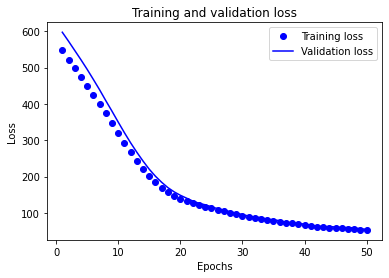

In [69]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

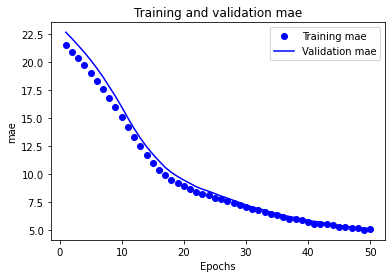

In [70]:
plt.clf() #Clears the figure
acc = history_dict['mae']
val_acc = history_dict['val_mae']
plt.plot(epochs, acc, 'bo', label='Training mae')
plt.plot(epochs, val_acc, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

Final mae of 5,5 on test set

Skip this part because it's not what the teacher did

Hyperparameter tuning ( number of epochs, batch size, optimizer)  using cross validation , here I use gridsearch and buit in cross validation (3-fold), It takes quite a long time to run ( Skip this part because it's not what the teacher did))

In [90]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
model = KerasRegressor(build_fn=build_model)
batch_size = [10, 20, 40, 60, 80, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(epochs=[50,80,100],batch_size = batch_size, optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, train_targets)

Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 483.6672 - mae: 19.8062
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 220.0568 - mae: 11.5671
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 119.6413 - mae: 8.3596
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 88.0651 - mae: 6.8665
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 66.2607 - mae: 5.7391
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 54.4131 - mae: 5.1563
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 48.5044 - mae: 4.8016
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 44.4481 - mae: 4.6411
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 40.4129 - mae: 4.4211
Epoch 10/100
41/41 [==============================] - 0s 1ms/step - loss: 37.3673 - mae: 4.2642
Epoch 11/100
41/41 [========================

In [94]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -12.177128 using {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adam'}
-52.970475 (34.891389) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
-18.309491 (2.306826) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'RMSprop'}
-169.834310 (37.675634) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adagrad'}
-579.879517 (53.717030) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adadelta'}
-17.163395 (2.827238) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adam'}
-33.206408 (9.555573) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adamax'}
-17.405756 (2.658802) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Nadam'}
-20.360068 (3.474340) with: {'batch_size': 10, 'epochs': 80, 'optimizer': 'SGD'}
-14.463805 (2.705325) with: {'batch_size': 10, 'epochs': 80, 'optimizer': 'RMSprop'}
-127.520546 (24.625031) with: {'batch_size': 10, 'epochs': 80, 'optimizer': 'Adagrad'}
-568.753855 (44.396246) with: {'batch_size': 10, 'epochs': 80, 'optimizer': 'A

So far the best configuration is {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adam'}

<br> Cross validation coded from scratch

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


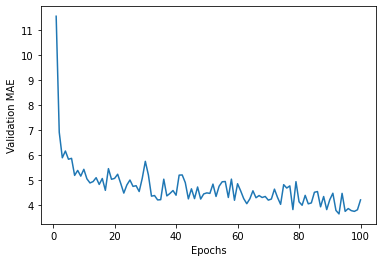

In [107]:
import numpy as np

k = 4

num_val_samples = len(train_data) // k

num_epochs = 100
all_mae_histories = []

for i in range(k):

    print('processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]

    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)

    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],

                                                                  train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()

    # history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,

                               validation_data=(val_data, val_targets),

                               epochs=num_epochs, batch_size=10, verbose=0)
    # val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] 
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [108]:
model = build_model()
model.fit(train_data, train_targets, 
               epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 36.9285 - mae: 4.5057


## <center> II- Convolutional neural networks <center>

1- MNIST

Prepare the data as we did in the previous sessions except now  We reshape images into 4D tensors as we are using CNNS

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255

Reshape data into 4d tensors

In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1) ## Specific to CNN
x_test = x_test.reshape(x_test.shape[0],28,28,1)

one hot encoding of the 10 classes

In [6]:
y_train = keras.utils.to_categorical(train_labels, 10) # 10 classes
y_test = keras.utils.to_categorical(test_labels, 10)

Build the model

In [7]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout

In [10]:
input_shape = (28,28,1)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,

              optimizer=keras.optimizers.Adadelta(),

              metrics=['accuracy'])

model.fit(x_train, y_train,

          batch_size=512,

          epochs=16,

          verbose=1,

          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

Epoch 1/16
118/118 [==============================] - 2s 17ms/step - loss: 2.2756 - accuracy: 0.1481 - val_loss: 2.2436 - val_accuracy: 0.2458
Epoch 2/16
118/118 [==============================] - 2s 16ms/step - loss: 2.2116 - accuracy: 0.3486 - val_loss: 2.1706 - val_accuracy: 0.4699
Epoch 3/16
118/118 [==============================] - 2s 16ms/step - loss: 2.1281 - accuracy: 0.5261 - val_loss: 2.0709 - val_accuracy: 0.6006
Epoch 4/16
118/118 [==============================] - 2s 16ms/step - loss: 2.0116 - accuracy: 0.6311 - val_loss: 1.9297 - val_accuracy: 0.6804
Epoch 5/16
118/118 [==============================] - 2s 16ms/step - loss: 1.8479 - accuracy: 0.7010 - val_loss: 1.7346 - val_accuracy: 0.7396
Epoch 6/16
118/118 [==============================] - 2s 16ms/step - loss: 1.6315 - accuracy: 0.7488 - val_loss: 1.4899 - val_accuracy: 0.7762
Epoch 7/16
118/118 [==============================] - 2s 15ms/step - loss: 1.3787 - accuracy: 0.7799 - val_loss: 1.2264 - val_accuracy: 0.8047

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________


Add dropout and max pooling to the previous network

In [13]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))

model2.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))

model2.add(Dropout(0.5))

model2.add(Dense(10, activation='softmax'))

In [15]:
model2.compile(loss=keras.losses.categorical_crossentropy,

              optimizer=keras.optimizers.Adadelta(),

              metrics=['accuracy'])

model2.fit(x_train, y_train,

          batch_size=512,

          epochs=16,

          verbose=1,

          validation_data=(x_test, y_test))

score2 = model2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score2[0])

print('Test accuracy:', score2[1])

Epoch 1/16
118/118 [==============================] - 2s 15ms/step - loss: 2.2633 - accuracy: 0.1737 - val_loss: 2.2440 - val_accuracy: 0.3227
Epoch 2/16
118/118 [==============================] - 2s 14ms/step - loss: 2.2454 - accuracy: 0.2124 - val_loss: 2.2231 - val_accuracy: 0.4207
Epoch 3/16
118/118 [==============================] - 2s 14ms/step - loss: 2.2262 - accuracy: 0.2448 - val_loss: 2.2000 - val_accuracy: 0.5103
Epoch 4/16
118/118 [==============================] - 2s 14ms/step - loss: 2.2033 - accuracy: 0.2837 - val_loss: 2.1741 - val_accuracy: 0.5613
Epoch 5/16
118/118 [==============================] - 2s 14ms/step - loss: 2.1799 - accuracy: 0.3178 - val_loss: 2.1450 - val_accuracy: 0.5913
Epoch 6/16
118/118 [==============================] - 2s 14ms/step - loss: 2.1506 - accuracy: 0.3565 - val_loss: 2.1118 - val_accuracy: 0.6147
Epoch 7/16
118/118 [==============================] - 2s 14ms/step - loss: 2.1180 - accuracy: 0.3896 - val_loss: 2.0738 - val_accuracy: 0.6314

2- CIFAR10 dataset

Load the data

Please Find the description of the dataset here http://www.cs.toronto.edu/~kriz/cifar.html

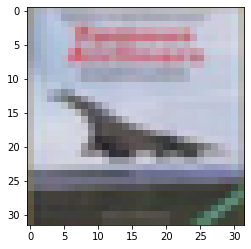

In [20]:
import matplotlib.pyplot as plt
from keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
 
plt.imshow(test_images [3])

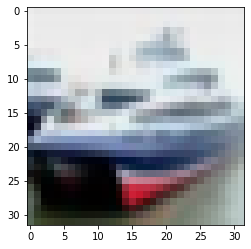

In [21]:
plt.imshow(test_images [1])

In [22]:
train_images.shape

(50000, 32, 32, 3)

In [30]:
test_labels.shape

(10000, 1)

The images are already reshaped as we want

In [ ]:

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


We need to encode labels

In [31]:
train_labels = keras.utils.to_categorical(train_labels, 10) # 10 classes
test_labels = keras.utils.to_categorical(test_labels, 10)

Define the model

In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

Compile and train the model

In [38]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=512,
          epochs=50,
          verbose=1,
          validation_data=(test_images, test_labels))

 

score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
98/98 [==============================] - 1s 10ms/step - loss: 0.1818 - accuracy: 0.9458 - val_loss: 2.9833 - val_accuracy: 0.6347
Epoch 2/50
98/98 [==============================] - 1s 9ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 3.1219 - val_accuracy: 0.6368
Epoch 3/50
98/98 [==============================] - 1s 9ms/step - loss: 0.0338 - accuracy: 0.9905 - val_loss: 3.2858 - val_accuracy: 0.6374
Epoch 4/50
98/98 [==============================] - 1s 9ms/step - loss: 0.0496 - accuracy: 0.9830 - val_loss: 3.4222 - val_accuracy: 0.6272
Epoch 5/50
98/98 [==============================] - 1s 9ms/step - loss: 0.1079 - accuracy: 0.9621 - val_loss: 3.1898 - val_accuracy: 0.6212
Epoch 6/50
98/98 [==============================] - 1s 9ms/step - loss: 0.1239 - accuracy: 0.9579 - val_loss: 3.3681 - val_accuracy: 0.6167
Epoch 7/50
98/98 [==============================] - 1s 9ms/step - loss: 0.0912 - accuracy: 0.9689 - val_loss: 3.3979 - val_accuracy: 0.6270
Epoch 8/50
98/98 [=

==> we clearly overfit the train data